<a href="https://colab.research.google.com/github/handetushar/Team-Capstone-Project-EDA/blob/main/Team_Notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Analysis**

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Data/Telecom Churn.csv')

In [ ]:
#Display first five rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Check shape of dataset
df.shape

(3333, 20)

Given dataset has 3333 rows and 20 cloumns from that one column is dependent column

In [ ]:
# Check if there has some null values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Wow, There are no null (missing) values data looks very clean

In [ ]:
# Get some more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Three attributes- State, International plan, Voice mail plan are object type where others are float or int type. Target variable churn is bool type.

In [ ]:
# Check descriptive statastics
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Check how many states data is given 
states=df['State'].unique()
len(states)

51

51 states data is given

# Univariate analysis
Lets look one feature at a time

## Check How many observations are churn and how many are not also plot them

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
 # Calculate this into %
 true_percent=df['Churn'].value_counts()[True]*100/len(df['Churn'])
 false_percent=df['Churn'].value_counts()[False]*100/len(df['Churn'])
 print('Observations that are churn is {:0.2f} %'.format(true_percent))
 print('Observations that are not churn is {:0.2f} %'.format(false_percent))

Observations that are churn is 14.49 %
Observations that are not churn is 85.51 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


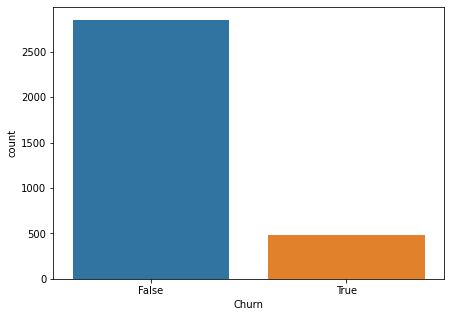

In [ ]:
# Plot using countplot
plt.figure(figsize=(7,5))
sns.countplot(df['Churn'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f050acf6790>,
      dtype=object)

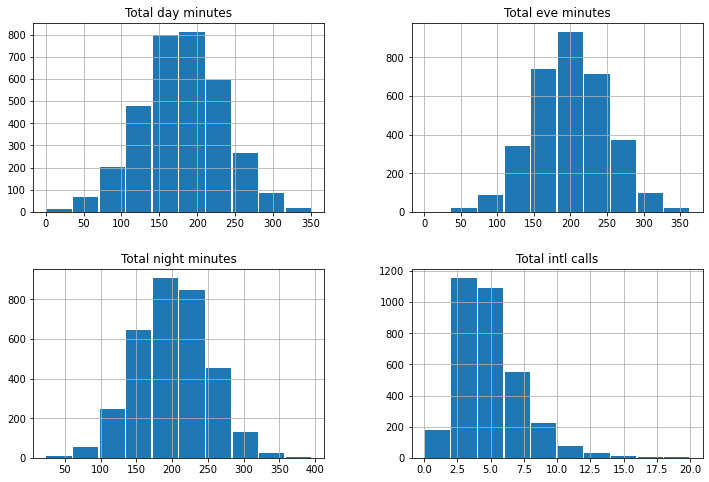

In [ ]:
# Histograms
features = ['Total day minutes','Total eve minutes', 'Total night minutes', 'Total intl calls' ]
df[features].hist(figsize=(12,8), rwidth=0.95)

Total day minutes, Total night minutes, Total eve minutes distributed normally while Total intl calls distributed right skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


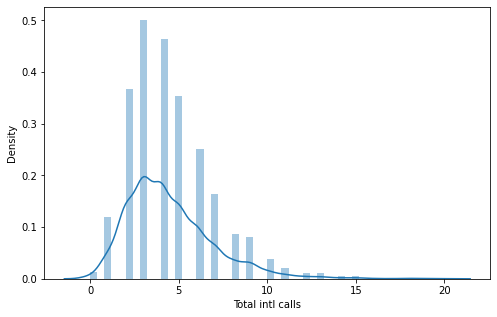

In [ ]:
# Lets draw distplot for total international calls
plt.figure(figsize=(8,5))
sns.distplot(df['Total intl calls'])


Most number of international calls are between 3 and 4 as it is right skewd defineitly there are outliers lets see that


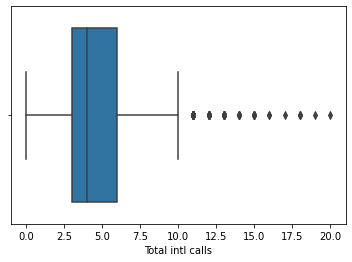

In [ ]:
# Using boxplot
sns.boxplot(x = 'Total intl calls', data = df)

It has some outliers this box plot will help us in the future

# Multivariate Analysis
Using two or more variables

## Check how many observations churn in each state

In [ ]:
# State wise churn
pd.crosstab(df['State'], df['Churn'])

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


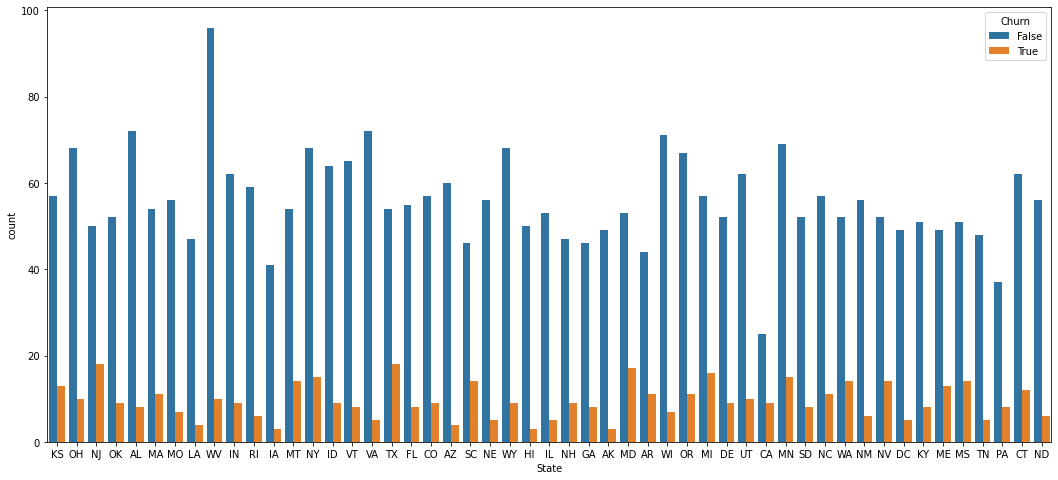

In [ ]:
#Lets plot it
plt.figure(figsize=(18,8))
sns.countplot(data=df, x='State', hue='Churn')

Most churners are in the satates NJ, TX, MD followed by MI, NY, MN

In [ ]:
# For international plan how many churn and how many not
pd.crosstab(df['International plan'], df['Churn'])

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


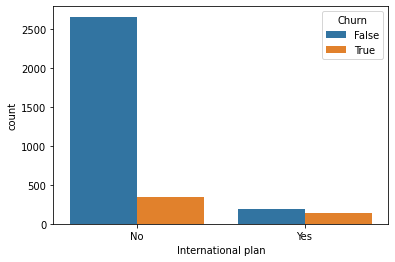

In [ ]:
# Plot using seaborn countplot
sns.countplot(data=df, x='International plan', hue='Churn')

Churning rate is higher if if the International plan is active


## Lets check if voice mail plan doing same effect

In [ ]:
pd.crosstab(df['Voice mail plan'], df['Churn'])

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


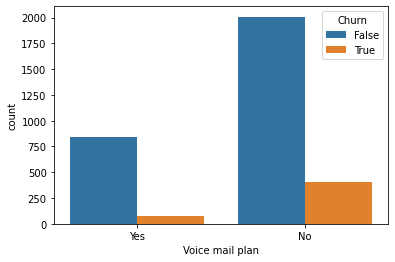

In [ ]:
sns.countplot(data=df, x='Voice mail plan', hue='Churn')

There is no such impact of voice mail plan like international plan for churn

## Now check customer service calls and churn 

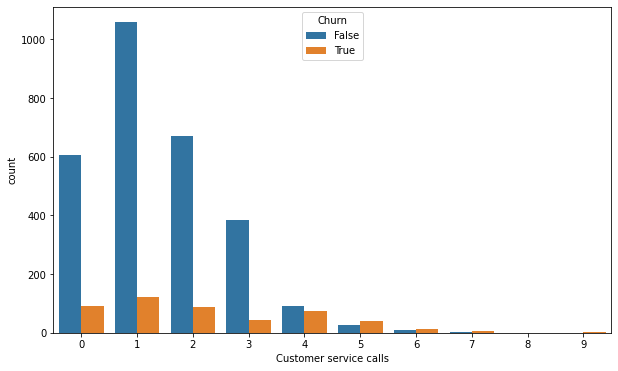

In [ ]:
# Plot it using countplot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Customer service calls', hue='Churn')

Chrun rate is increasing after four or more customer service calls

## Lets check how total charge effect's on churn

In [ ]:
# Lest convert churn from bool to integer so we can draw kdeplot
df["Churn"] = df["Churn"].astype(int)

In [ ]:
# Check if it's worked or not
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Perfect..!

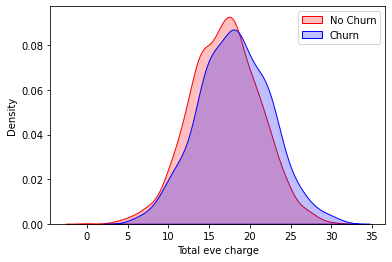

In [ ]:
#Check churn by total eveining change
eve = sns.kdeplot(df['Total eve charge'][(df["Churn"] == 0)] ,
                color="Red", shade = True)
eve = sns.kdeplot(df['Total eve charge'][(df["Churn"] == 1)] ,
                ax =eve, color="Blue", shade= True)
eve.legend(["No Churn","Churn"],loc='upper right')

Churn increase when total evening charge increase

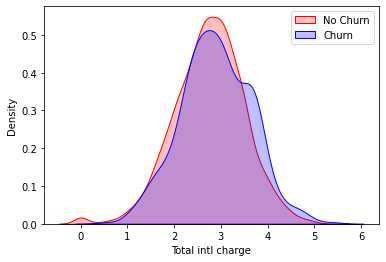

In [ ]:
#Check churn by total intl change
int = sns.kdeplot(df['Total intl charge'][(df["Churn"] == 0)] ,
                color="Red", shade = True)
int = sns.kdeplot(df['Total intl charge'][(df["Churn"] == 1)] ,
                ax =int, color="blue", shade= True)
int.legend(["No Churn","Churn"],loc='upper right')


In this case also churn increase when total intl charge increase

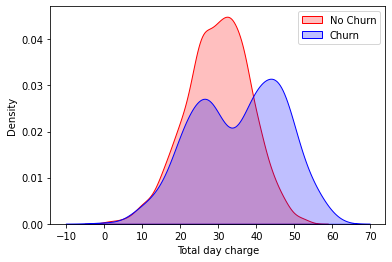

In [ ]:
# Plot kdeplot for total day charge and churn
day = sns.kdeplot(df['Total day charge'][(df["Churn"] == 0)] ,
                color="Red", shade = True)
day = sns.kdeplot(df['Total day charge'][(df["Churn"] == 1)] ,
                ax =day, color="Blue", shade= True)
day.legend(["No Churn","Churn"],loc='upper right')

Oops..! Churn is very high when there is high total day charge 

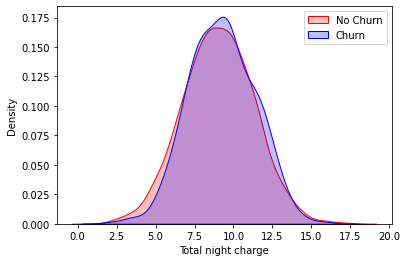

In [ ]:
# Ptot kdeplot for total night charge and churn
night = sns.kdeplot(df['Total night charge'][(df["Churn"] == 0)] ,
                color="Red", shade = True)
night = sns.kdeplot(df['Total night charge'][(df["Churn"] == 1)] ,
                ax =night, color="Blue", shade= True)
night.legend(["No Churn","Churn"],loc='upper right')

Surprising, not as much effect on churn if total night change is high

## Seaborn Heatmap

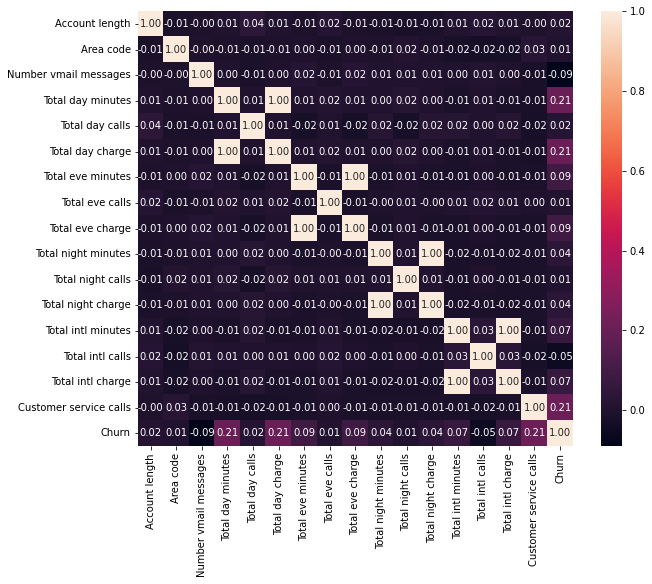

In [ ]:
#Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True, square=True, fmt='.2f')


Total day minutes, Total day charge, and customer service calls highly correlated with churn

#Conclusion:


We did lots of work. First we check how many coustomers left us. Then the datatyes for each attributes and null values in the dataset as dataset was very clean there was not any null values. We also checked distribution of some features and outliers. <br>
But that was not enough we used countplots and kdeplot to see what features actually effects on target variable.<br>
1.Customers with the International Plan tend to churn more frequently..<br>
2.Customers calling more than 3 service calls churns easily.<br>
3.Increase in Charge also effect's on churn rate.